In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

#1. Train Test Split

In [3]:
#split data into test = 0.2,  random_state = 42, stratify = y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#2. Model Training

##A. Logistic Regression

In [4]:
# train the logistic regression on data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
logreg_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, logreg_pred))
print("Classification Report:\n", classification_report(y_test, logreg_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, logreg_pred))

Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[38  4]
 [ 1 71]]


ROC Curve

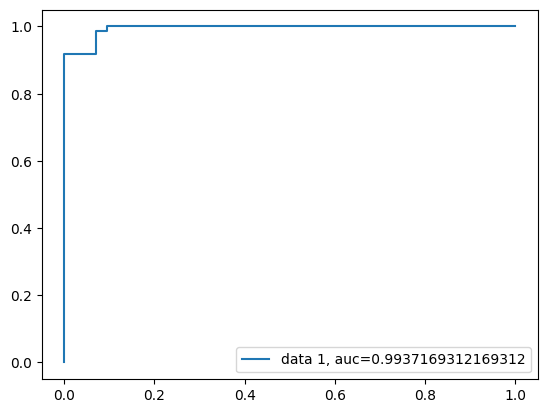

In [7]:
import matplotlib.pyplot as plt
from sklearn import metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

There is a 99.37% probability that the model ranks a randomly chosen cancer case higher than a randomly chosen non-cancer case.

## B. SVM

In [43]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
# Set probability=True to enable predict_proba
clf = svm.SVC(kernel='linear', probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
clf_pred = clf.predict(X_test)


In [21]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, clf_pred))


Accuracy: 0.956140350877193


In [22]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, clf_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, clf_pred))


Precision: 0.9466666666666667
Recall: 0.9861111111111112


##3. KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
knn_pred = knn.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9298245614035088


getting the best value of K through Cross Validation

In [26]:
import numpy as np
from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,31)]
scores = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

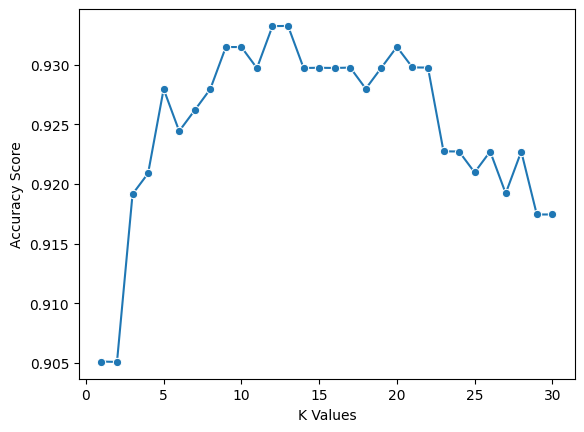

In [27]:
import seaborn as sns
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

we can see that the values 12,13 have higher accuracy, lowest k value is recommended, so we will go with k = 12.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [29]:
knn_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9385964912280702


# 3. Model Evaluation

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {
    "Logistic Regression": logreg_pred,
    "SVM": clf_pred,
    "KNN": knn_pred
}

for name, preds in models.items():
    print(f"\n===== {name} =====")

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='binary')
    rec = recall_score(y_test, preds, average='binary')
    f1 = f1_score(y_test, preds, average='binary')
    cm = confusion_matrix(y_test, preds)

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)



===== Logistic Regression =====
Accuracy:  0.9561
Precision: 0.9467
Recall:    0.9861
F1-score:  0.9660
Confusion Matrix:
[[38  4]
 [ 1 71]]

===== SVM =====
Accuracy:  0.9561
Precision: 0.9467
Recall:    0.9861
F1-score:  0.9660
Confusion Matrix:
[[38  4]
 [ 1 71]]

===== KNN =====
Accuracy:  0.9386
Precision: 0.9452
Recall:    0.9583
F1-score:  0.9517
Confusion Matrix:
[[38  4]
 [ 3 69]]


# 4. Model Comparison

In [34]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1) Build comparison table
models = {
    "Logistic Regression": logreg_pred,
    "SVM": clf_pred,
    "KNN": knn_pred
}

rows = []
for name, preds in models.items():
    rows.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1-score": f1_score(y_test, preds),
    })

comparison_df = pd.DataFrame(rows).round(4)


In [51]:
# In Medical Diagnosis, Recall matters most.
best_metric = "Recall"
best_model_name = comparison_df.loc[comparison_df[best_metric].idxmax(), "Model"]


reasoning: Missing a real cancer case (False Negative) is far more dangerous than wrongly flagging a healthy person (False Positive).

A False Negative in cancer diagnosis could mean:

Delayed treatment
Disease progression
Higher mortality

So we prioritize:

Recall = TP / (TP + FN)
“Out of all actual cancer cases, how many did we catch?”

In [52]:
def highlight_best_row(row):
    return ["background-color: #d9fdd3" if row["Model"] == best_model_name else "" for _ in row]

styled = (
    comparison_df
    .sort_values(by=best_metric, ascending=False)
    .style
    .apply(highlight_best_row, axis=1)
    .highlight_max(subset=["Accuracy", "Precision", "Recall", "F1-score"], axis=0, props="font-weight: bold;")
    .set_caption(f"Model Comparison (Best by {best_metric}: {best_model_name})")
    .format("{:.4f}", subset=["Accuracy", "Precision", "Recall", "F1-score"])
)

styled

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.9561,0.9467,0.9861,0.9660
1,SVM,0.9561,0.9467,0.9861,0.9660
2,KNN,0.9386,0.9452,0.9583,0.9517


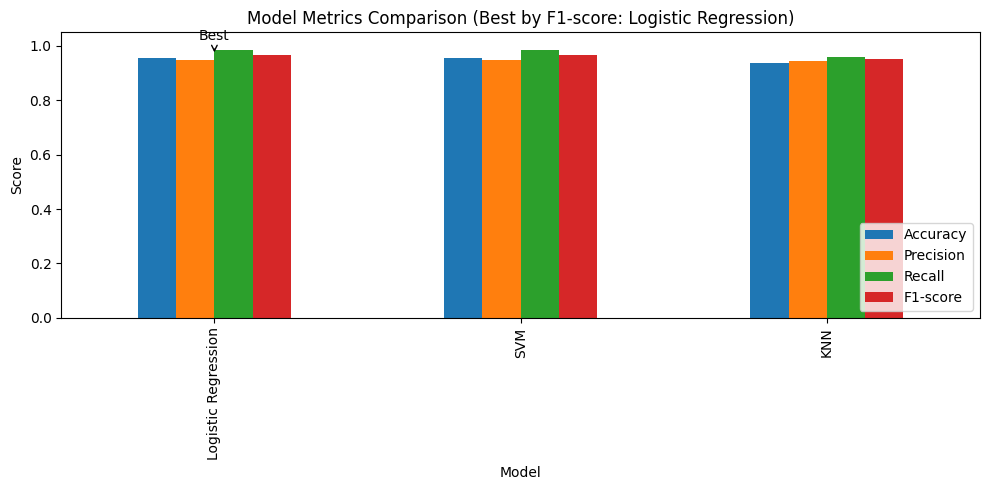

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize: metric comparison bar chart + emphasize best model
plot_df = comparison_df.set_index("Model").copy()

metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
best_metric = "F1-score"  # keep consistent with above
best_model_name = plot_df[best_metric].idxmax()

ax = plot_df[metrics].plot(kind="bar", figsize=(10, 5))
ax.set_title(f"Model Metrics Comparison (Best by {best_metric}: {best_model_name})")
ax.set_xlabel("Model")
ax.set_ylabel("Score")
ax.set_ylim(0, 1.05)
ax.legend(loc="lower right")

# Add a simple arrow annotation pointing to the best model's best_metric bar
best_x = list(plot_df.index).index(best_model_name)
best_y = plot_df.loc[best_model_name, best_metric]

ax.annotate(
    "Best",
    xy=(best_x, best_y),
    xytext=(best_x, min(1.02, best_y + 0.12)),
    arrowprops=dict(arrowstyle="->"),
    ha="center"
)

plt.tight_layout()
plt.show()

In [54]:
import numpy as np

np.array_equal(logreg_pred, clf_pred)

False

In [55]:
logreg_probs = logreg.predict_proba(X_test)[:, 1]
svm_probs = clf.predict_proba(X_test)[:, 1]  # only if probability=True

Logistic Regression and SVM achieved identical performance on the test set. This suggests that the dataset is close to linearly separable, allowing both linear and nonlinear models to reach similar decision boundaries.

In medical datasets, ROC-AUC is usually more informative than accuracy.

In [47]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, logreg_probs)
roc_auc_score(y_test, svm_probs)

np.float64(0.9963624338624338)

In [48]:
np.mean(np.abs(logreg_probs - svm_probs))

np.float64(0.03404568420773141)

this ensures that the models performance is not identical, and the reason for the similartiy apart from the rounding up is how linearly separable.